In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

In [20]:
# Baca file CSV
df1 = pd.read_csv("Data_Oil_Rents.csv", delimiter=',')

# Jika seluruh data masih dalam satu kolom, gunakan split
if len(df1.columns) == 1:  # Cek jika hanya ada satu kolom
    df_split = df1[df1.columns[0]].str.split(',', expand=True)
else:
    df_split = df1 

# Tampilkan data awal
print(df_split.head())


                            0      1                       2   \
0                        Aruba  "ABW"  "Oil rents (% of GDP)"   
1  Africa Eastern and Southern  "AFE"  "Oil rents (% of GDP)"   
2                  Afghanistan  "AFG"  "Oil rents (% of GDP)"   
3   Africa Western and Central  "AFW"  "Oil rents (% of GDP)"   
4                       Angola  "AGO"  "Oil rents (% of GDP)"   

                    3   4   5   6   7   8   9   ...                     60  \
0  "NY.GDP.PETR.RT.ZS"  ""  ""  ""  ""  ""  ""  ...                    "0"   
1  "NY.GDP.PETR.RT.ZS"  ""  ""  ""  ""  ""  ""  ...     "1.38717572157153"   
2  "NY.GDP.PETR.RT.ZS"  ""  ""  ""  ""  ""  ""  ...  "0.00944508042929387"   
3  "NY.GDP.PETR.RT.ZS"  ""  ""  ""  ""  ""  ""  ...     "2.43541268382625"   
4  "NY.GDP.PETR.RT.ZS"  ""  ""  ""  ""  ""  ""  ...     "19.7483988340046"   

                     61                   62                    63  \
0                   "0"                  "0"                   "0"   


In [22]:
df_split.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
244,Turkiye,"""TUR""","""Oil rents (% of GDP)""","""NY.GDP.PETR.RT.ZS""","""""","""""","""""","""""","""""","""""",...,"""0.0349237617230731""","""0.0537573237557546""","""0.108111878645291""","""0.102518297949539""","""0.0612400945022421""","""0.13797082409881""","""""","""""",,None
236,Latin America & the Caribbean (IDA & IBRD coun...,"""TLA""","""Oil rents (% of GDP)""","""NY.GDP.PETR.RT.ZS""","""""","""""","""""","""""","""""","""""",...,"""0.860953388713009""","""1.12169572587839""","""1.77904430446477""","""1.47653723268554""","""0.834974442617104""","""1.97954393059124""","""""","""""",,None
73,European Union,"""EUU""","""Oil rents (% of GDP)""","""NY.GDP.PETR.RT.ZS""","""""","""""","""""","""""","""""","""""",...,"""0.0207039121534414""","""0.0298806110937066""","""0.0436090218105902""","""0.0373599516824352""","""0.0196740438507625""","""0.0402653632766573""","""""","""""",,None
154,Mexico,"""MEX""","""Oil rents (% of GDP)""","""NY.GDP.PETR.RT.ZS""","""""","""""","""""","""""","""""","""""",...,"""1.23719531597201""","""1.55624412694841""","""2.20735150189898""","""1.58229584530394""","""0.867384554620089""","""2.06594374719816""","""""","""""",,None
12,Antigua and Barbuda,"""ATG""","""Oil rents (% of GDP)""","""NY.GDP.PETR.RT.ZS""","""""","""""","""""","""""","""""","""""",...,"""0""","""0""","""0""","""0""","""0""","""0""","""""","""""",,None


In [28]:
# Baca file CSV
df2 = pd.read_csv("world-oil-database.csv", delimiter=',')

# Jika seluruh data masih dalam satu kolom, gunakan split
if len(df2.columns) == 1:  # Cek jika hanya ada satu kolom
    df_split_2 = df2[df2.columns[0]].str.split(';', expand=True)
else:
    df_split_2 = df2

# Tampilkan data awal
print(df_split_2.head())

         0                     1          2                3        4  \
0  2002-01  United Arab Emirates  Crude Oil   Closing stocks  CONVBBL   
1  2002-01  United Arab Emirates  Crude Oil       Production  CONVBBL   
2  2002-01  United Arab Emirates  Crude Oil  Refinery intake       KL   
3  2002-01  United Arab Emirates  Crude Oil    Stock changes     KBBL   
4  2002-01  United Arab Emirates  Crude Oil          Imports  CONVBBL   

           5  6  
0  7596.0000  3  
1  7596.0000  3  
2   995.5801  3  
3          0  3  
4  7596.0000  3  


In [34]:
df_split_2.head()

,0,1,2,3,4,5,6
0,2002-01,United Arab Emirates,Crude Oil,Closing stocks,CONVBBL,7596.0000,3
1,2002-01,United Arab Emirates,Crude Oil,Production,CONVBBL,7596.0000,3
2,2002-01,United Arab Emirates,Crude Oil,Refinery intake,KL,995.5801,3
3,2002-01,United Arab Emirates,Crude Oil,Stock changes,KBBL,0,3
4,2002-01,United Arab Emirates,Crude Oil,Imports,CONVBBL,7596.0000,3


In [30]:
# Baca file CSV
df3 = pd.read_csv("saudi-oil-database.csv", delimiter=';')

# Jika seluruh data masih dalam satu kolom, gunakan split
if len(df3.columns) == 1:  # Cek jika hanya ada satu kolom
    df_split_3 = df3[df3.columns[0]].str.split(';', expand=True)
else:
    df_split_3 = df3

# Tampilkan data awal
print(df_split_3.head())

  Time Period Energy Product Name      Flow breakdown Unit of Measure  \
0     2005-05           Crude Oil      Closing stocks             KBD   
1     2005-05           Crude Oil      Closing stocks           KTONS   
2     2005-05           Crude Oil          Direct use              KL   
3     2005-05           Crude Oil  From other sources              KL   
4     2005-05           Crude Oil     Refinery intake             KBD   

        Value  Assessment Code  
0           x                1  
1  22198.2794                1  
2         NaN                3  
3         NaN                3  
4   1734.0000                3  


In [31]:
df_split_3.head()

,Time Period,Energy Product Name,Flow breakdown,Unit of Measure,Value,Assessment Code
0,2005-05,Crude Oil,Closing stocks,KBD,x,1
1,2005-05,Crude Oil,Closing stocks,KTONS,22198.2794,1
2,2005-05,Crude Oil,Direct use,KL,NaN,3
3,2005-05,Crude Oil,From other sources,KL,NaN,3
4,2005-05,Crude Oil,Refinery intake,KBD,1734.0000,3


In [32]:
df_split_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562000 entries, 0 to 3561999
Data columns (total 7 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
 1   1       object
 2   2       object
 3   3       object
 4   4       object
 5   5       object
 6   6       object
dtypes: object(7)
memory usage: 190.2+ MB


In [39]:
df_split_2 = df_split_2.rename(columns={0: 'Year', 1: 'Country', 2 : 'Energy Product Name',3 : 'Flow Breakdown',4:'Unit of Measure',5:'Value',6:'Assesment_Code'})

In [40]:
df_split_2.head()

,Year,Country,Energy Product Name,Flow Breakdown,Unit of Measure,Value,Assesment_Code
0,2002-01,United Arab Emirates,Crude Oil,Closing stocks,CONVBBL,7596.0000,3
1,2002-01,United Arab Emirates,Crude Oil,Production,CONVBBL,7596.0000,3
2,2002-01,United Arab Emirates,Crude Oil,Refinery intake,KL,995.5801,3
3,2002-01,United Arab Emirates,Crude Oil,Stock changes,KBBL,0,3
4,2002-01,United Arab Emirates,Crude Oil,Imports,CONVBBL,7596.0000,3


In [42]:
df_split_2[['Assesment_Code']].value_counts()

Assesment_Code
3                 3097725
1                  437999
2                   26276
Name: count, dtype: int64

In [45]:
df_split_2['Unit of Measure'].unique()

array(['CONVBBL', 'KL', 'KBBL', 'KBD', 'KTONS'], dtype=object)

In [46]:
df_split_2['Flow Breakdown'].unique()

array(['Closing stocks', 'Production', 'Refinery intake', 'Stock changes',
       'Imports', 'Products transferred/Backflows', 'Direct use',
       'Statistical difference', 'From other sources', 'Exports',
       'Refinery output', 'Products transferred', 'Receipts', 'Demand',
       'IProducts transferred'], dtype=object)

In [47]:
df_split_2['Energy Product Name'].unique()

array(['Crude Oil', 'NGL', 'Other', 'Total', 'Gas/diesel oil',
       'Motor and aviation gasoline', 'Fuel Oil', 'Total oil products',
       'Liquefied petroleum gases', 'Naphtha', 'Other oil products',
       'Kerosenes of which: kerosene type jet fuel', 'Kerosenes'],
      dtype=object)

In [48]:
df_split_2[['Country']].value_counts()

Country             
Algeria                 178100
Bahrain                 178100
Canada                  178100
China                   178100
India                   178100
Iraq                    178100
Kuwait                  178100
Libya                   178100
Mexico                  178100
Morocco                 178100
Norway                  178100
Oman                    178100
Qatar                   178100
Russia                  178100
Saudi Arabia            178100
Syria                   178100
Tunisia                 178100
United Arab Emirates    178100
United States           178100
Yemen                   178100
Name: count, dtype: int64

In [49]:
df_split_2.columns

Index(['Year', 'Country', 'Energy Product Name', 'Flow Breakdown',
       'Unit of Measure', 'Value', 'Assesment_Code'],
      dtype='object')

In [51]:
df_split_2.isnull().sum()

Year                   0
Country                0
Energy Product Name    0
Flow Breakdown         0
Unit of Measure        0
Value                  0
Assesment_Code         0
dtype: int64

In [52]:
len(df_split_2.drop_duplicates()) / len(df_split_2)

1.0

In [53]:
for column in df_split_2.columns:
    print(f"============= {column} =================")
    display(df_split_2[column].value_counts())
    print()

============= Year =================


Year
2024-10    13000
2002-01    13000
2023-06    13000
2023-05    13000
2023-04    13000
           ...  
2002-07    13000
2002-06    13000
2002-05    13000
2002-04    13000
2002-03    13000
Name: count, Length: 274, dtype: int64


============= Country =================


Country
United Arab Emirates    178100
Algeria                 178100
China                   178100
Canada                  178100
Bahrain                 178100
Mexico                  178100
Norway                  178100
Oman                    178100
Qatar                   178100
India                   178100
Libya                   178100
Morocco                 178100
Iraq                    178100
Kuwait                  178100
Russia                  178100
Saudi Arabia            178100
Syria                   178100
United States           178100
Tunisia                 178100
Yemen                   178100
Name: count, dtype: int64


============= Energy Product Name =================


Energy Product Name
Crude Oil                                     274000
NGL                                           274000
Other                                         274000
Total                                         274000
Gas/diesel oil                                274000
Motor and aviation gasoline                   274000
Fuel Oil                                      274000
Total oil products                            274000
Liquefied petroleum gases                     274000
Naphtha                                       274000
Other oil products                            274000
Kerosenes of which: kerosene type jet fuel    274000
Kerosenes                                     274000
Name: count, dtype: int64


============= Flow Breakdown =================


Flow Breakdown
Closing stocks                    356200
Imports                           356200
Stock changes                     356200
Exports                           356200
Statistical difference            356200
Products transferred              246600
Refinery output                   246600
Demand                            246600
Receipts                          246600
IProducts transferred             246600
Refinery intake                   109600
Direct use                        109600
Products transferred/Backflows    109600
Production                        109600
From other sources                109600
Name: count, dtype: int64


============= Unit of Measure =================


Unit of Measure
CONVBBL    712400
KL         712400
KBBL       712400
KBD        712400
KTONS      712400
Name: count, dtype: int64


============= Value =================


Value
              719040
0.0000        707688
0             697751
x             142480
7400.0000      42992
               ...  
-768.9355          1
7431.6746          1
9071.8306          1
7511.8483          1
51851.0000         1
Name: count, Length: 242128, dtype: int64


============= Assesment_Code =================


Assesment_Code
3    3097725
1     437999
2      26276
Name: count, dtype: int64

In [54]:
# Cek nilai unik dalam kolom 'Value'
print(df_split_2['Value'].unique())

['7596.0000' '995.5801' '0' ... '66.1597' '66.6408' '70.8510']


In [55]:
# Ganti nilai non-numerik dengan NaN
df_split_2['Value'] = pd.to_numeric(df_split_2['Value'], errors='coerce')

In [58]:
print(df_split_2[df_split_2['Value'] < 0])

            Year               Country Energy Product Name  \
938      2009-12  United Arab Emirates           Crude Oil   
1010     2010-07  United Arab Emirates           Crude Oil   
1012     2010-07  United Arab Emirates           Crude Oil   
1046     2010-10  United Arab Emirates           Crude Oil   
1114     2011-05  United Arab Emirates           Crude Oil   
...          ...                   ...                 ...   
3547856  2024-09         United States  Total oil products   
3547857  2024-09         United States  Total oil products   
3547858  2024-09         United States  Total oil products   
3547866  2024-10         United States  Total oil products   
3547868  2024-10         United States  Total oil products   

                 Flow Breakdown Unit of Measure       Value Assesment_Code  
938               Stock changes              KL    -42.4497              3  
1010              Stock changes            KBBL   -985.0000              3  
1012              Stock 

In [61]:
df_dropped = df_split_2.drop(columns=['Value'])

In [62]:
df_dropped.head()

,Year,Country,Energy Product Name,Flow Breakdown,Unit of Measure,Assesment_Code
0,2002-01,United Arab Emirates,Crude Oil,Closing stocks,CONVBBL,3
1,2002-01,United Arab Emirates,Crude Oil,Production,CONVBBL,3
2,2002-01,United Arab Emirates,Crude Oil,Refinery intake,KL,3
3,2002-01,United Arab Emirates,Crude Oil,Stock changes,KBBL,3
4,2002-01,United Arab Emirates,Crude Oil,Imports,CONVBBL,3


In [67]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562000 entries, 0 to 3561999
Data columns (total 6 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Year                 datetime64[ns]
 1   Country              object        
 2   Energy Product Name  object        
 3   Flow Breakdown       object        
 4   Unit of Measure      object        
 5   Assesment_Code       int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 163.1+ MB


In [64]:
# Konversi kolom Year-Month menjadi datetime
df_dropped['Year'] = pd.to_datetime(df_dropped['Year'], format='%Y-%m')

In [66]:
# Mengonversi kolom 'Assesment_Code' menjadi integer
df_dropped['Assesment_Code'] = df_dropped['Assesment_Code'].astype(int)

In [69]:
# Memeriksa nilai unik di setiap kolom kategori
for col in ['Country', 'Energy Product Name', 'Flow Breakdown']:
    print(f"{col}: {df_dropped[col].nunique()} unique values")
    print(df_dropped[col].unique())

Country: 20 unique values
['United Arab Emirates' 'Algeria' 'China' 'Canada' 'Bahrain' 'Mexico'
 'Norway' 'Oman' 'Qatar' 'India' 'Libya' 'Morocco' 'Iraq' 'Kuwait'
 'Russia' 'Saudi Arabia' 'Syria' 'United States' 'Tunisia' 'Yemen']
Energy Product Name: 13 unique values
['Crude Oil' 'NGL' 'Other' 'Total' 'Gas/diesel oil'
 'Motor and aviation gasoline' 'Fuel Oil' 'Total oil products'
 'Liquefied petroleum gases' 'Naphtha' 'Other oil products'
 'Kerosenes of which: kerosene type jet fuel' 'Kerosenes']
Flow Breakdown: 15 unique values
['Closing stocks' 'Production' 'Refinery intake' 'Stock changes' 'Imports'
 'Products transferred/Backflows' 'Direct use' 'Statistical difference'
 'From other sources' 'Exports' 'Refinery output' 'Products transferred'
 'Receipts' 'Demand' 'IProducts transferred']


In [71]:
# Memeriksa beberapa contoh data untuk konsistensi
print(df_dropped[['Country', 'Energy Product Name']].sample(5))

                      Country          Energy Product Name
2227152                  Oman           Total oil products
3325931                  Oman  Motor and aviation gasoline
160829           Saudi Arabia                        Total
1300987                 Yemen                        Other
436151   United Arab Emirates                          NGL


In [72]:
df_cleaned = df_dropped.copy()

In [73]:
# Menyimpan dataset yang sudah dibersihkan
df_cleaned.to_csv('world_oil_cleaned.csv', index=False)

In [74]:
df_cleaned.columns

Index(['Year', 'Country', 'Energy Product Name', 'Flow Breakdown',
       'Unit of Measure', 'Assesment_Code'],
      dtype='object')

In [75]:
df = df_cleaned.copy()

In [76]:
df.describe()

,Year,Assesment_Code
count,3562000,3.562000e+06
mean,2013-05-16 21:11:49.489050880,2.746695e+00
min,2002-01-01 00:00:00,1.000000e+00
25%,2007-09-01 00:00:00,3.000000e+00
50%,2013-05-16 12:00:00,3.000000e+00
75%,2019-02-01 00:00:00,3.000000e+00
max,2024-10-01 00:00:00,3.000000e+00
std,NaN,6.595988e-01


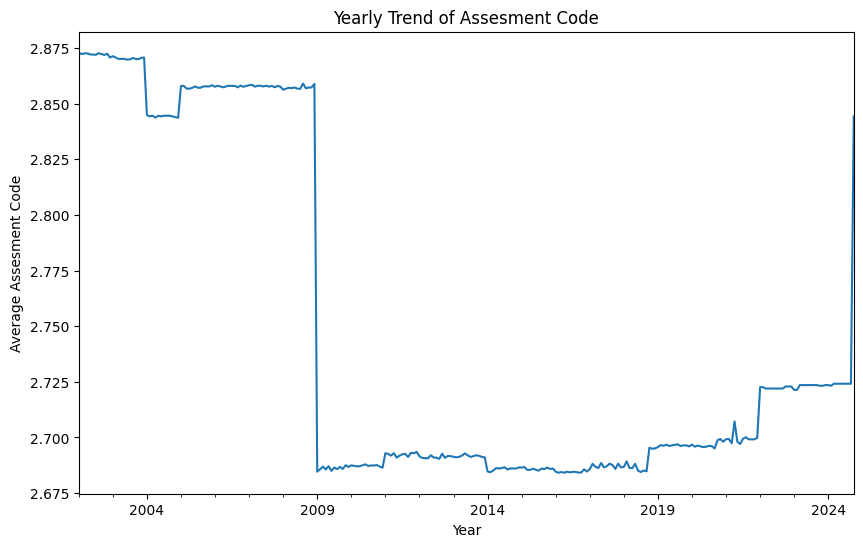

In [78]:
# Kelompokkan berdasarkan 'Year' dan hitung rata-rata Assesment_Code
yearly_trend = df.groupby('Year')['Assesment_Code'].mean()

# Visualisasi tren tahunan
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
yearly_trend.plot(kind='line')
plt.title('Yearly Trend of Assesment Code')
plt.xlabel('Year')
plt.ylabel('Average Assesment Code')
plt.show()

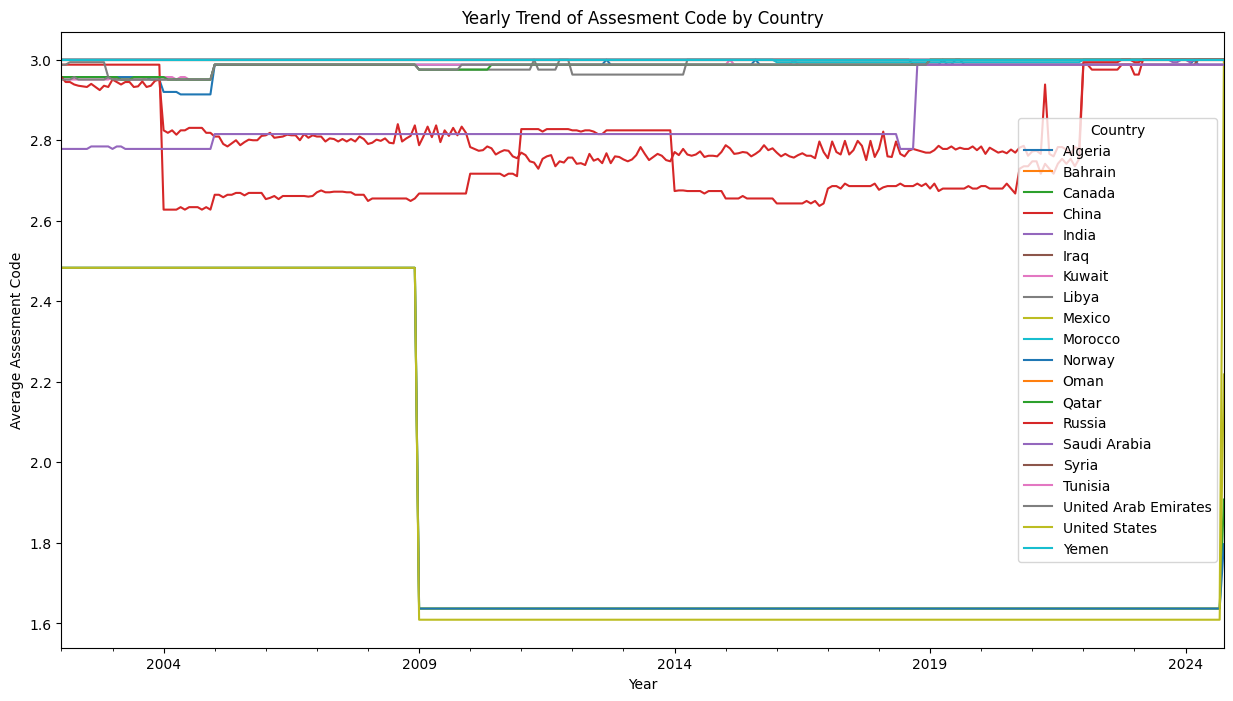

In [79]:
# Kelompokkan berdasarkan 'Year' dan 'Country' untuk menghitung rata-rata Assesment_Code
country_trend = df.groupby(['Year', 'Country'])['Assesment_Code'].mean().unstack()

# Visualisasi tren per negara
country_trend.plot(figsize=(15, 8))
plt.title('Yearly Trend of Assesment Code by Country')
plt.xlabel('Year')
plt.ylabel('Average Assesment Code')
plt.legend(title='Country')
plt.show()

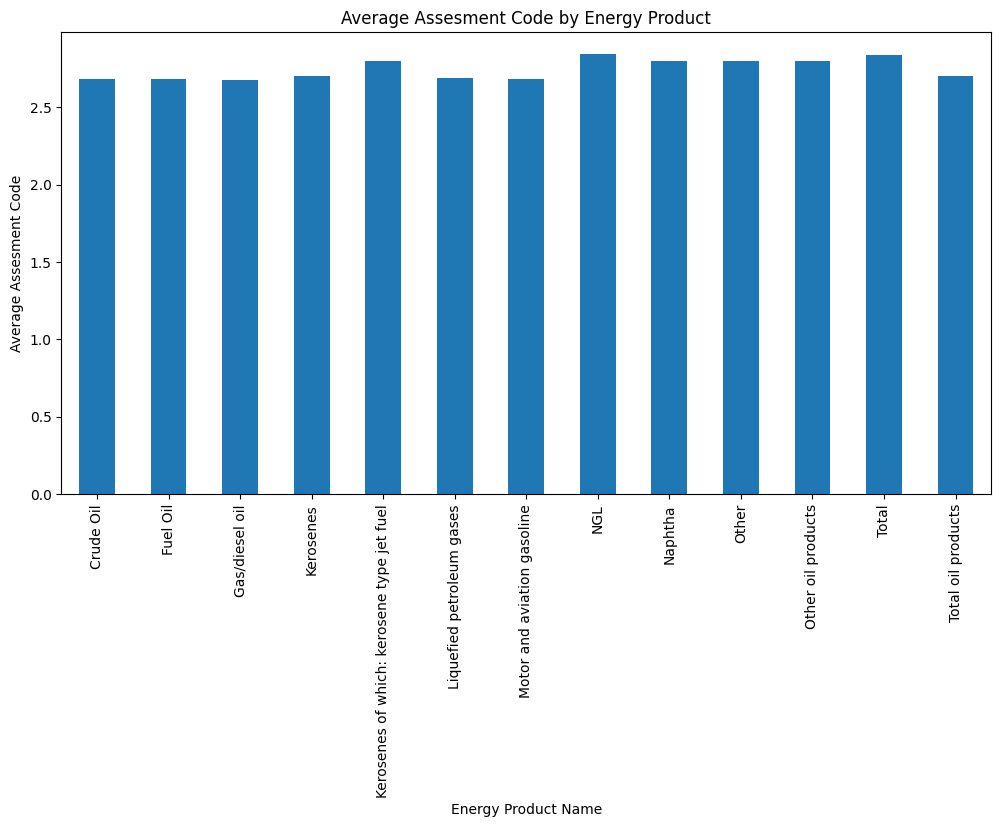

In [80]:
# Rata-rata Assesment_Code berdasarkan kategori
category_comparison = df.groupby('Energy Product Name')['Assesment_Code'].mean()

# Visualisasi perbandingan
category_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Average Assesment Code by Energy Product')
plt.xlabel('Energy Product Name')
plt.ylabel('Average Assesment Code')
plt.xticks(rotation=90)
plt.show()

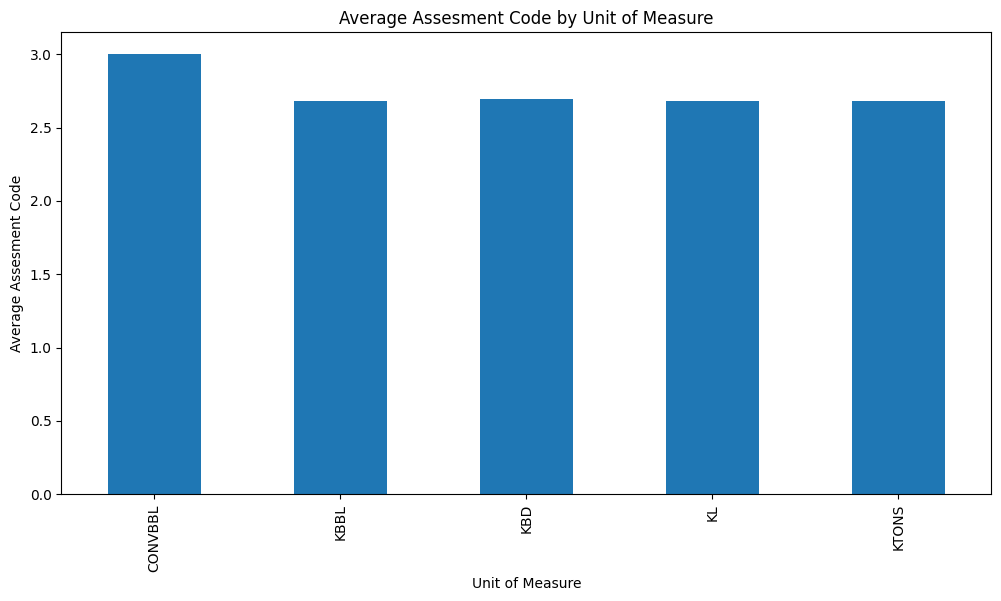

In [81]:
# Rata-rata Assesment_Code berdasarkan Unit of Measure
unit_comparison = df.groupby('Unit of Measure')['Assesment_Code'].mean()

# Visualisasi perbandingan
unit_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Average Assesment Code by Unit of Measure')
plt.xlabel('Unit of Measure')
plt.ylabel('Average Assesment Code')
plt.xticks(rotation=90)
plt.show()

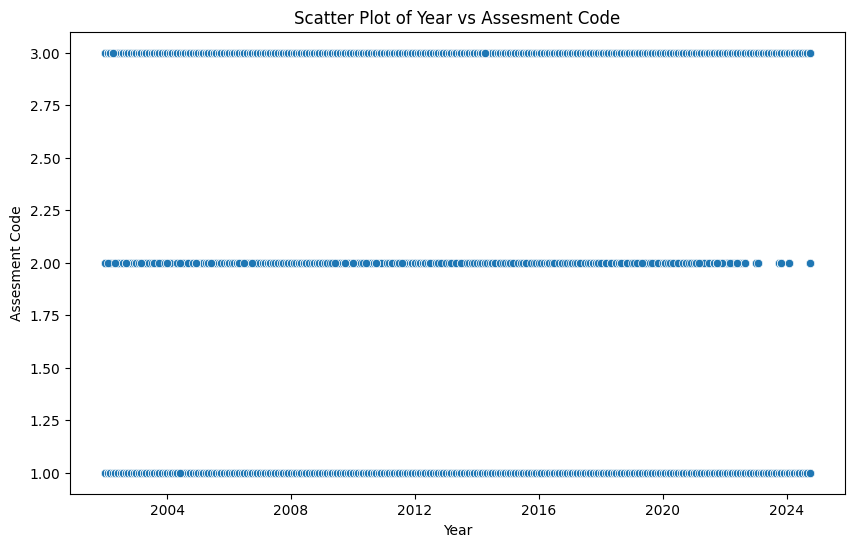

In [83]:
# Scatter plot antara Year dan Assesment_Code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Assesment_Code', data=df)
plt.title('Scatter Plot of Year vs Assesment Code')
plt.xlabel('Year')
plt.ylabel('Assesment Code')
plt.show()

In [87]:
# Hitung frekuensi kemunculan setiap kategori
frequency = df['Flow Breakdown'].value_counts()

# Urutkan berdasarkan frekuensi
print(frequency)

Flow Breakdown
Closing stocks                    356200
Imports                           356200
Stock changes                     356200
Exports                           356200
Statistical difference            356200
Products transferred              246600
Refinery output                   246600
Demand                            246600
Receipts                          246600
IProducts transferred             246600
Refinery intake                   109600
Direct use                        109600
Products transferred/Backflows    109600
Production                        109600
From other sources                109600
Name: count, dtype: int64


In [89]:
# Lakukan One-Hot Encoding untuk kolom 'Flow Breakdown'
df_encoded = pd.get_dummies(df, columns=['Flow Breakdown'], drop_first=True)

# Tampilkan hasil encoding
df_encoded.head()

,Year,Country,Energy Product Name,Unit of Measure,Assesment_Code,Flow Breakdown_Demand,Flow Breakdown_Direct use,Flow Breakdown_Exports,Flow Breakdown_From other sources,Flow Breakdown_IProducts transferred,Flow Breakdown_Imports,Flow Breakdown_Production,Flow Breakdown_Products transferred,Flow Breakdown_Products transferred/Backflows,Flow Breakdown_Receipts,Flow Breakdown_Refinery intake,Flow Breakdown_Refinery output,Flow Breakdown_Statistical difference,Flow Breakdown_Stock changes
0,2002-01-01,United Arab Emirates,Crude Oil,CONVBBL,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2002-01-01,United Arab Emirates,Crude Oil,CONVBBL,3,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,2002-01-01,United Arab Emirates,Crude Oil,KL,3,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,2002-01-01,United Arab Emirates,Crude Oil,KBBL,3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2002-01-01,United Arab Emirates,Crude Oil,CONVBBL,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [91]:
# Cek hasil encoding
print(df_encoded[['Flow Breakdown_Direct use', 'Flow Breakdown_Imports', 'Flow Breakdown_Stock changes']].head())

   Flow Breakdown_Direct use  Flow Breakdown_Imports  \
0                      False                   False   
1                      False                   False   
2                      False                   False   
3                      False                   False   
4                      False                    True   

   Flow Breakdown_Stock changes  
0                         False  
1                         False  
2                         False  
3                          True  
4                         False  


In [92]:
print(df_encoded.dtypes)

Year                                             datetime64[ns]
Country                                                  object
Energy Product Name                                      object
Unit of Measure                                          object
Assesment_Code                                            int64
Flow Breakdown_Demand                                      bool
Flow Breakdown_Direct use                                  bool
Flow Breakdown_Exports                                     bool
Flow Breakdown_From other sources                          bool
Flow Breakdown_IProducts transferred                       bool
Flow Breakdown_Imports                                     bool
Flow Breakdown_Production                                  bool
Flow Breakdown_Products transferred                        bool
Flow Breakdown_Products transferred/Backflows              bool
Flow Breakdown_Receipts                                    bool
Flow Breakdown_Refinery intake          

In [96]:
# Mengonversi kolom boolean ke tipe numerik (1 dan 0)
df_encoded.columns
# Daftar kolom yang ingin dikonversi
columns_to_convert = [
    'Flow Breakdown_Demand', 'Flow Breakdown_Direct use',
    'Flow Breakdown_Exports', 'Flow Breakdown_From other sources',
    'Flow Breakdown_IProducts transferred', 'Flow Breakdown_Imports',
    'Flow Breakdown_Production', 'Flow Breakdown_Products transferred',
    'Flow Breakdown_Products transferred/Backflows',
    'Flow Breakdown_Receipts', 'Flow Breakdown_Refinery intake',
    'Flow Breakdown_Refinery output',
    'Flow Breakdown_Statistical difference',
    'Flow Breakdown_Stock changes'
]

# Mengonversi kolom yang dipilih ke tipe numerik (1 dan 0)
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)

# Cek hasil konversi
df_encoded[columns_to_convert].dtypes


Flow Breakdown_Demand                            int64
Flow Breakdown_Direct use                        int64
Flow Breakdown_Exports                           int64
Flow Breakdown_From other sources                int64
Flow Breakdown_IProducts transferred             int64
Flow Breakdown_Imports                           int64
Flow Breakdown_Production                        int64
Flow Breakdown_Products transferred              int64
Flow Breakdown_Products transferred/Backflows    int64
Flow Breakdown_Receipts                          int64
Flow Breakdown_Refinery intake                   int64
Flow Breakdown_Refinery output                   int64
Flow Breakdown_Statistical difference            int64
Flow Breakdown_Stock changes                     int64
dtype: object

In [99]:
# Pilih hanya kolom numerik untuk analisis korelasi
numeric_df = df_encoded.select_dtypes(include=['number'])

# Tampilkan data numerik
numeric_df.head()

,Assesment_Code,Flow Breakdown_Demand,Flow Breakdown_Direct use,Flow Breakdown_Exports,Flow Breakdown_From other sources,Flow Breakdown_IProducts transferred,Flow Breakdown_Imports,Flow Breakdown_Production,Flow Breakdown_Products transferred,Flow Breakdown_Products transferred/Backflows,Flow Breakdown_Receipts,Flow Breakdown_Refinery intake,Flow Breakdown_Refinery output,Flow Breakdown_Statistical difference,Flow Breakdown_Stock changes
0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0


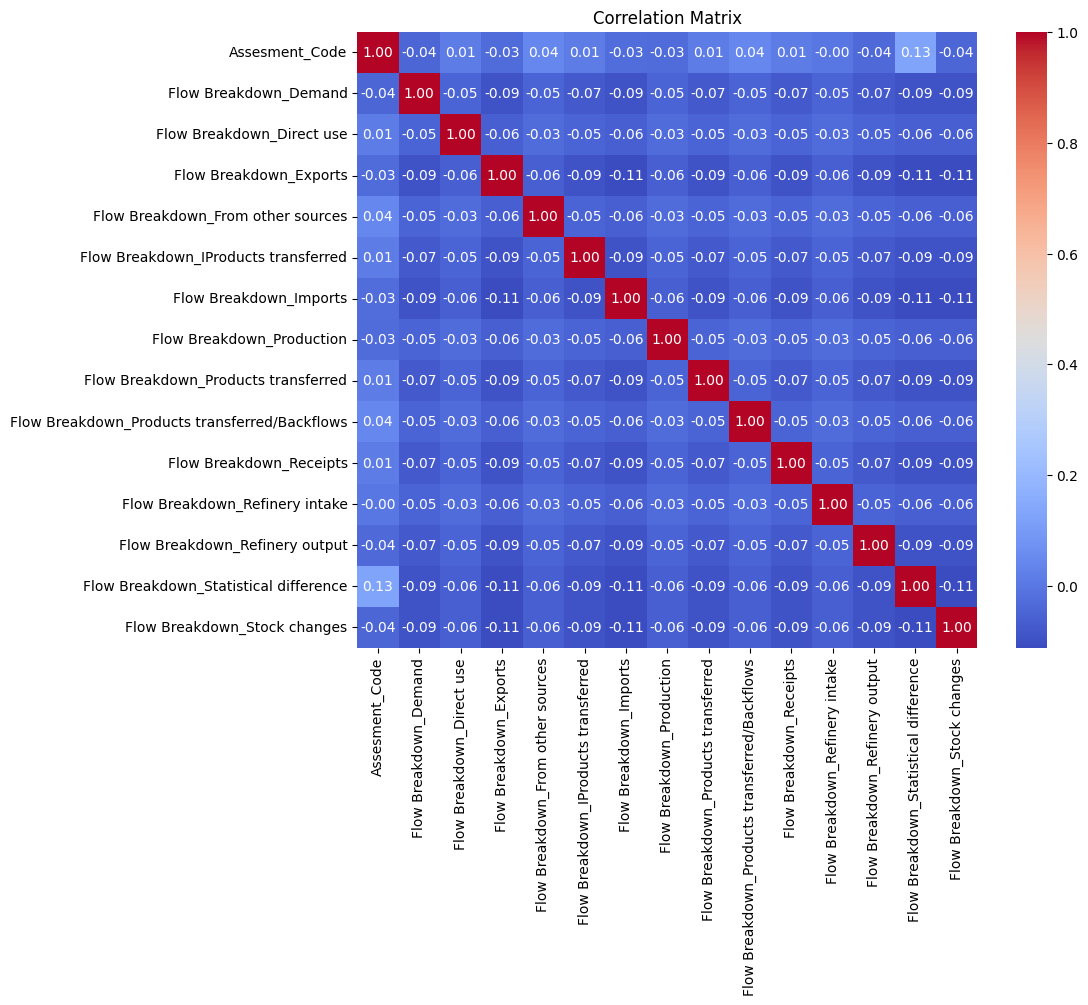

In [101]:
# Hitung matriks korelasi antar kolom numerik
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
